In [8]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [9]:
#Generate Random Social Media Data
categories = ["Food", "Travel", "Fashion", "Fitness", "Music", "Culture", "Family", "Health"]

# set the number of data points (n)
n = 500

# Generate random data dictionary
data = {
    'Date': pd.date_range(start='2024-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

# create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

In [10]:
#Load data into DataFrame and Explore
#print the first 5 rows of the DataFrame
print(df.head())
print(df.info())
print(df.describe(include='all'))
print(df['Category'].value_counts())


        Date Category  Likes
0 2024-01-01     Food   8840
1 2024-01-02   Health   9787
2 2024-01-03     Food   2572
3 2024-01-04     Food   8182
4 2024-01-05    Music    373
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None
                       Date Category        Likes
count                   500      500   500.000000
unique                  NaN        8          NaN
top                     NaN    Music          NaN
freq                    NaN       74          NaN
mean    2024-09-06 12:00:00      NaN  4992.302000
min     2024-01-01 00:00:00      NaN    19.000000
25%     2024-05-04 18:00:00      NaN  2354.750000
50%     2024-09-06

In [11]:
#drop null values
df = df.dropna()

#remove duplicate rows
df = df.drop_duplicates()
df['Date'] = pd.to_datetime(df['Date'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None


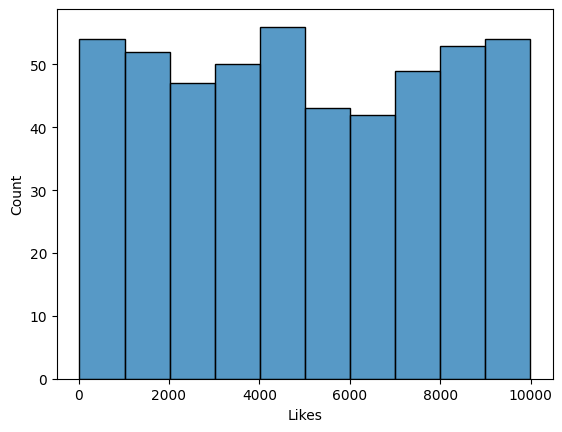

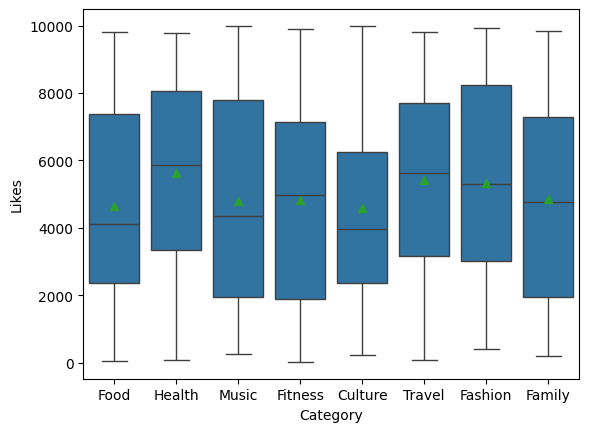

Mean Likes: 4992.302

Mean Likes by Category:
Category
Culture    4596.777778
Family     4867.116667
Fashion    5317.027778
Fitness    4821.984375
Food       4660.956522
Health     5633.209302
Music      4791.581081
Travel     5407.093750
Name: Likes, dtype: float64


In [13]:
# Visualization with Seaborn
sns.histplot(df['Likes'])
plt.show()

sns.boxplot(
    x = "Category",
    y = "Likes",
    showmeans=True,
    data=df
)
plt.show()

# Statistics with Pandas
print("Mean Likes:", df['Likes'].mean())

# Grouped mean by Category
category_means = df.groupby('Category')['Likes'].mean()
print("\nMean Likes by Category:")
print(category_means)